# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + city # + "&appid=" + weather_api_key

requests.get(city_url).json()

{'coord': {'lon': -73.414, 'lat': 41.3712},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 52.32,
  'feels_like': 51.44,
  'temp_min': 49.55,
  'temp_max': 55.36,
  'pressure': 1011,
  'humidity': 89},
 'visibility': 9656,
 'wind': {'speed': 1.01, 'deg': 303, 'gust': 4},
 'rain': {'1h': 0.12},
 'clouds': {'all': 100},
 'dt': 1682221364,
 'sys': {'type': 2,
  'id': 2004826,
  'country': 'US',
  'sunrise': 1682157817,
  'sunset': 1682206824},
 'timezone': -14400,
 'id': 5282297,
 'name': 'Bethel',
 'cod': 200}

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_cloudiness = city_weather["clouds"]["all"]
        city_wind_speed = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_cloudiness,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tura
Processing Record 2 of Set 1 | tolanaro
Processing Record 3 of Set 1 | alice springs
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | ciudad bolivar
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | muratpasa
City not found. Skipping...
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | uturoa
Processing Record 13 of Set 1 | kilbirnie
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | revda
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | barra do garcas
Processing Record 19 of Set 1 | berezovyy
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | invercar

Processing Record 38 of Set 4 | walvis bay
Processing Record 39 of Set 4 | happy valley-goose bay
Processing Record 40 of Set 4 | daru
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | kalajoki
Processing Record 43 of Set 4 | avarua
Processing Record 44 of Set 4 | grand baie
Processing Record 45 of Set 4 | calatayud
Processing Record 46 of Set 4 | mhangura
Processing Record 47 of Set 4 | sisimiut
Processing Record 48 of Set 4 | hasaki
Processing Record 49 of Set 4 | maumere
Processing Record 0 of Set 5 | whitehorse
Processing Record 1 of Set 5 | cidreira
Processing Record 2 of Set 5 | rio gallegos
Processing Record 3 of Set 5 | port glaud
City not found. Skipping...
Processing Record 4 of Set 5 | hermanus
Processing Record 5 of Set 5 | genhe
Processing Record 6 of Set 5 | midvagur
Processing Record 7 of Set 5 | moose jaw
Processing Record 8 of Set 5 | stanley
Processing Record 9 of Set 5 | ploudalmezeau
Processing Record 10 of Set 5 | poyarkovo
Processing Record 

Processing Record 26 of Set 8 | zhalantun
Processing Record 27 of Set 8 | vikhorevka
Processing Record 28 of Set 8 | pikalevo
Processing Record 29 of Set 8 | dudinka
Processing Record 30 of Set 8 | katsuura
Processing Record 31 of Set 8 | auki
Processing Record 32 of Set 8 | kenora
Processing Record 33 of Set 8 | bubaque
Processing Record 34 of Set 8 | saipan
Processing Record 35 of Set 8 | chui
Processing Record 36 of Set 8 | kovdor
Processing Record 37 of Set 8 | sao vicente
Processing Record 38 of Set 8 | howard springs
Processing Record 39 of Set 8 | zernograd
Processing Record 40 of Set 8 | verkhnevilyuysk
Processing Record 41 of Set 8 | wagar
Processing Record 42 of Set 8 | tanout
Processing Record 43 of Set 8 | queenstown
Processing Record 44 of Set 8 | chimay
Processing Record 45 of Set 8 | labrador city
Processing Record 46 of Set 8 | shizunai-furukawacho
Processing Record 47 of Set 8 | pisco
Processing Record 48 of Set 8 | muroto-misakicho
Processing Record 49 of Set 8 | weno

Processing Record 16 of Set 12 | itambe
Processing Record 17 of Set 12 | bontang
Processing Record 18 of Set 12 | egilsstadir
Processing Record 19 of Set 12 | qarah bagh
Processing Record 20 of Set 12 | dangriga
Processing Record 21 of Set 12 | plaquemine
Processing Record 22 of Set 12 | ocean city
Processing Record 23 of Set 12 | inirida
Processing Record 24 of Set 12 | priargunsk
Processing Record 25 of Set 12 | fray luis beltran
Processing Record 26 of Set 12 | kourou
Processing Record 27 of Set 12 | cidade velha
Processing Record 28 of Set 12 | along
Processing Record 29 of Set 12 | qulsary
Processing Record 30 of Set 12 | bad frankenhausen
Processing Record 31 of Set 12 | lospalos
Processing Record 32 of Set 12 | umm kaddadah
Processing Record 33 of Set 12 | espargos
City not found. Skipping...
Processing Record 34 of Set 12 | martinsicuro
Processing Record 35 of Set 12 | haiku-pauwela
Processing Record 36 of Set 12 | marsabit
Processing Record 37 of Set 12 | veraval
Processing Re

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
city_data_df['Date'] = city_data_df['Date'].dt.strftime('%Y-%m-%d')
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tura,25.5198,90.2201,81.90,50,100,4.03,IN,2023-04-23
1,tolanaro,-25.0319,46.9987,70.88,79,0,2.93,MG,2023-04-23
2,alice springs,-23.7000,133.8833,78.35,27,34,16.11,AU,2023-04-23
3,olonkinbyen,70.9221,-8.7187,25.39,59,8,12.84,SJ,2023-04-23
4,adamstown,-25.0660,-130.1015,75.31,91,100,12.95,PN,2023-04-23


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,81.90,50,100,4.03,IN,2023-04-23
1,tolanaro,-25.0319,46.9987,70.88,79,0,2.93,MG,2023-04-23
2,alice springs,-23.7000,133.8833,78.35,27,34,16.11,AU,2023-04-23
3,olonkinbyen,70.9221,-8.7187,25.39,59,8,12.84,SJ,2023-04-23
4,adamstown,-25.0660,-130.1015,75.31,91,100,12.95,PN,2023-04-23


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

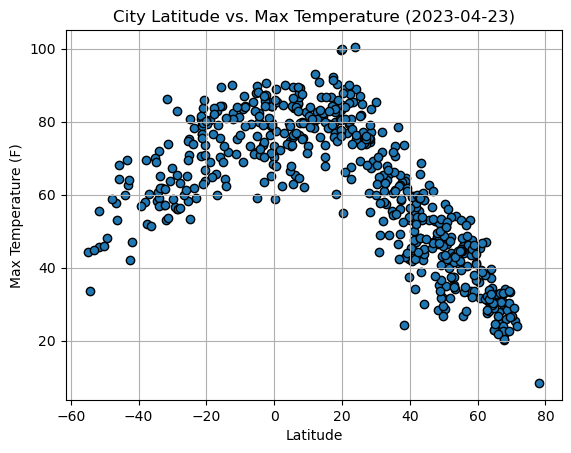

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
lat_vs_temp = plt.scatter( city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="Black") 

title = f"City Latitude vs. Max Temperature ({city_data_df['Date'].min()})"
plt.title(title)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Lat_vs_Temps_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

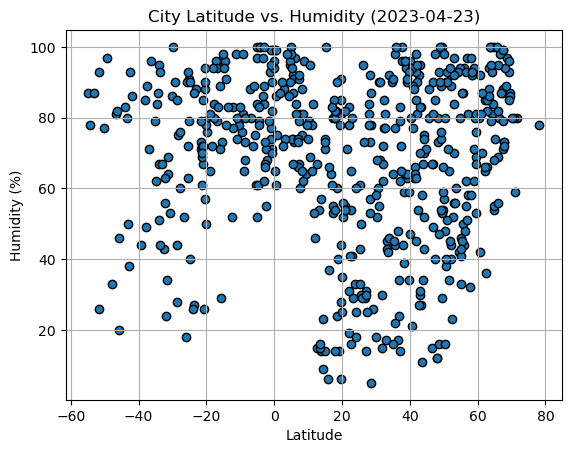

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
lat_vs_humid = plt.scatter( city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="Black") 

title = f"City Latitude vs. Humidity ({city_data_df['Date'].min()})"

plt.title(title)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
# Save the figure
plt.savefig("../output_data/lat_vs_humid_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

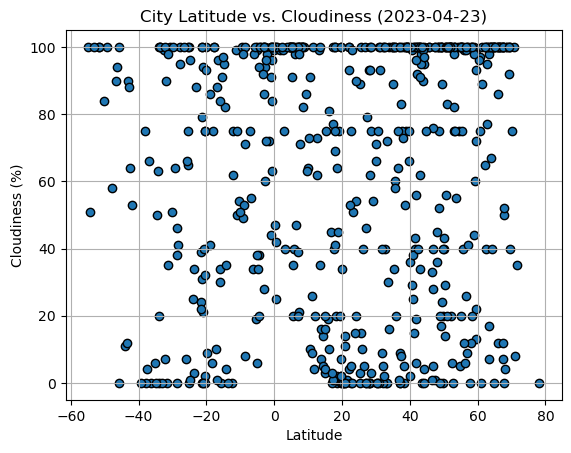

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
lat_vs_clouds = plt.scatter( city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="Black") 
 
title = f"City Latitude vs. Cloudiness ({city_data_df['Date'].min()})"
    
plt.title(title)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/lat_vs_clouds_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

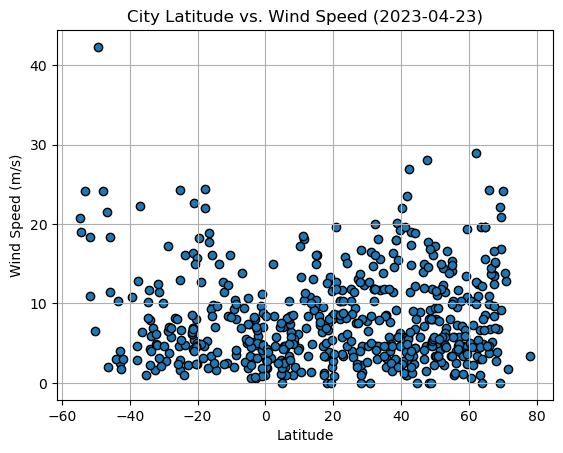

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
lat_vs_clouds = plt.scatter( city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="Black") 
 
title = f"City Latitude vs. Wind Speed ({city_data_df['Date'].min()})"
    
plt.title(title)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/lat_vs_windspeed_Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
city_data_df = city_data_df.rename(columns={"Max Temp": "Max Temp (F)", "Humidity": "Humidity (%)",
                                           "Cloudiness": "Cloudiness (%)", "Wind Speed": "Wind Speed (mph)"})
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,81.90,50,100,4.03,IN,2023-04-23
1,tolanaro,-25.0319,46.9987,70.88,79,0,2.93,MG,2023-04-23
2,alice springs,-23.7000,133.8833,78.35,27,34,16.11,AU,2023-04-23
3,olonkinbyen,70.9221,-8.7187,25.39,59,8,12.84,SJ,2023-04-23
4,adamstown,-25.0660,-130.1015,75.31,91,100,12.95,PN,2023-04-23


In [30]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
from scipy.stats import linregress

def plot_linear_regression(df, x_col, y_col):
    """
    Plots a scatter plot with a linear regression line for two columns in a dataframe.

    Parameters:
        df (pandas.DataFrame): The dataframe containing the data.
        x_col (str): The name of the column to use as the x-axis.
        y_col (str): The name of the column to use as the y-axis.
    """

    # Calculate linear regression parameters using linregress
    slope, intercept, rvalue, pvalue, stderr = linregress(df[x_col], df[y_col])

    # Create scatter plot with matplotlib
    plt.scatter(df[x_col], df[y_col])

    # Add regression line to scatter plot
    plt.plot(df[x_col], intercept + slope*df[x_col], 'r')

    # Set title with variable names
    title = f"{x_col.capitalize()} vs. {y_col.capitalize()} Linear Regression"
    plt.title(title)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Show plot
    plt.show()


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
City_ID,,,,,,,,,
0,tura,25.5198,90.2201,81.90,50,100,4.03,IN,2023-04-23
3,olonkinbyen,70.9221,-8.7187,25.39,59,8,12.84,SJ,2023-04-23
6,ciudad bolivar,8.1222,-63.5497,79.90,75,100,0.96,VE,2023-04-23
8,albany,42.6001,-73.9662,55.63,92,100,11.39,US,2023-04-23
11,kilbirnie,55.7508,-4.6879,45.93,87,100,1.01,GB,2023-04-23


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
City_ID,,,,,,,,,
1,tolanaro,-25.0319,46.9987,70.88,79,0,2.93,MG,2023-04-23
2,alice springs,-23.7000,133.8833,78.35,27,34,16.11,AU,2023-04-23
4,adamstown,-25.0660,-130.1015,75.31,91,100,12.95,PN,2023-04-23
5,carnarvon,-24.8667,113.6333,80.80,40,96,6.71,AU,2023-04-23
7,blackmans bay,-43.0167,147.3167,62.74,50,90,2.46,AU,2023-04-23


###  Temperature vs. Latitude Linear Regression Plot

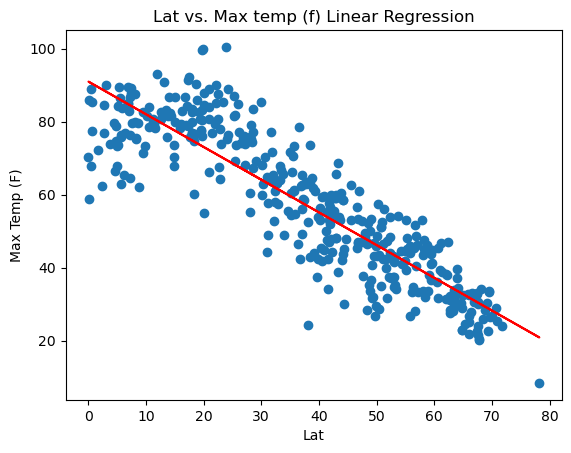

In [34]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, 'Lat', 'Max Temp (F)')


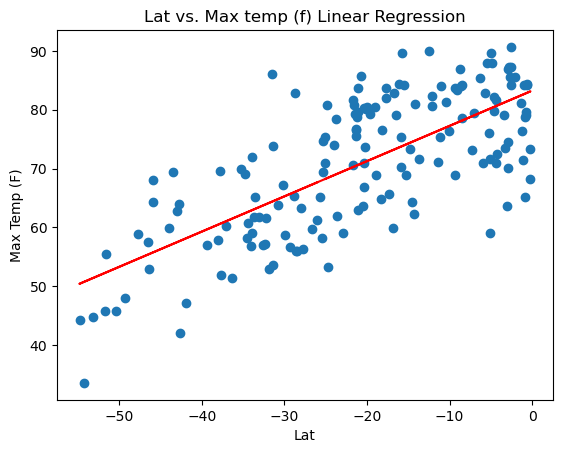

In [35]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, 'Lat', 'Max Temp (F)')


**Discussion about the linear relationship:** The linear regressions above show the max temperatures increasing closer to latitude 0, and max temperatures decreasing away from latitude 0 for the current datetime.  With the maximum temperatures clustered tightly to the regression line, there appears to be a strong linear relationship between latitude and temperature.  

### Humidity vs. Latitude Linear Regression Plot

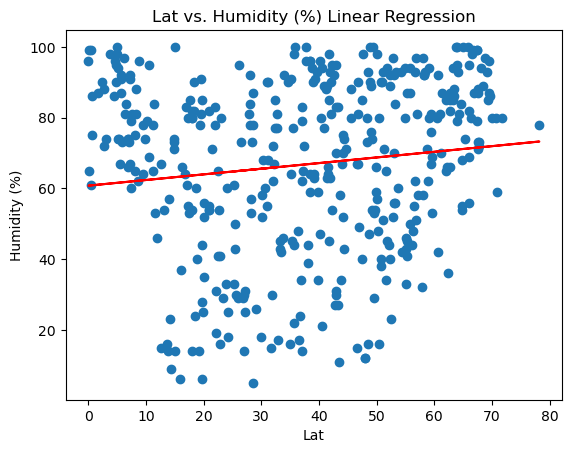

In [36]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, 'Lat', 'Humidity (%)')


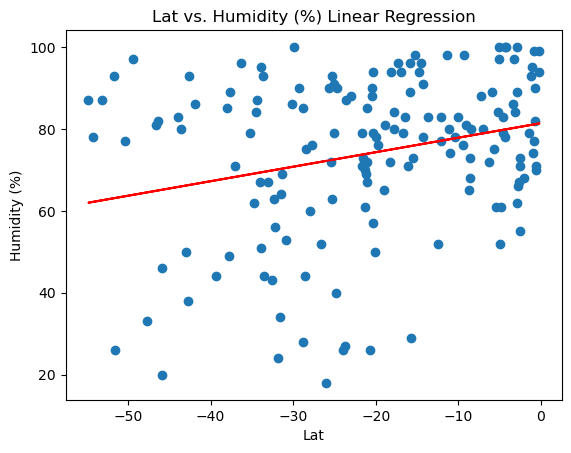

In [37]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, 'Lat', 'Humidity (%)')


**Discussion about the linear relationship:** The trend line for humidity was no more than 20% between the max latitudes and latitude 0.  However, the humidity data is widely dispersed from the regression line indicating a weak relationship between humidity and position of latitude.

### Cloudiness vs. Latitude Linear Regression Plot

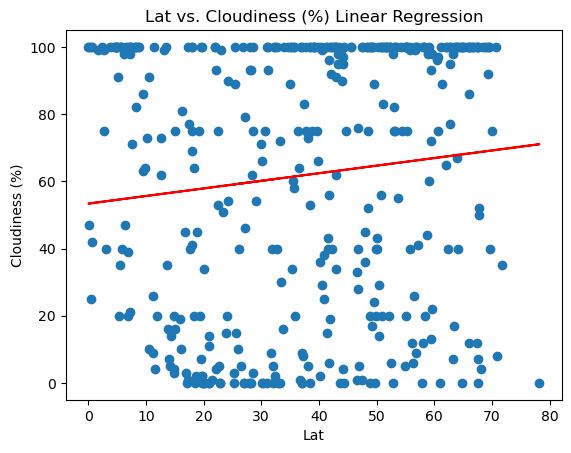

In [38]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, 'Lat', 'Cloudiness (%)')


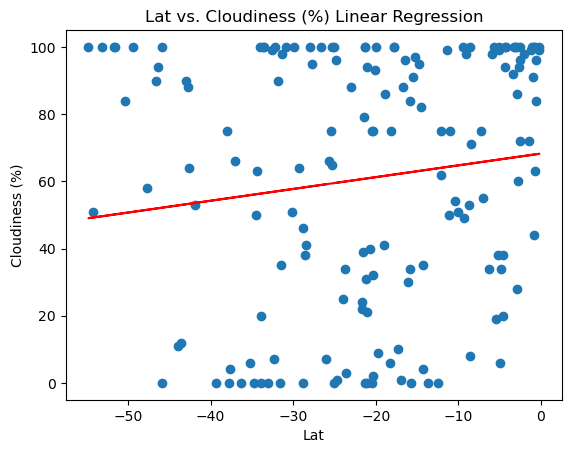

In [39]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness (%)')


**Discussion about the linear relationship:** We see in this linear regression model, a similar correlation between cloudiness and latitude, as was demonstrated between humidity and latitude.  The trend line for cloudiness was no more than 20% increase from the max latitudes and latitude 0. However, the cloud data is widely dispersed from the regression line indicating a weak relationship between cloudiness and position of latitude.  

### Wind Speed vs. Latitude Linear Regression Plot

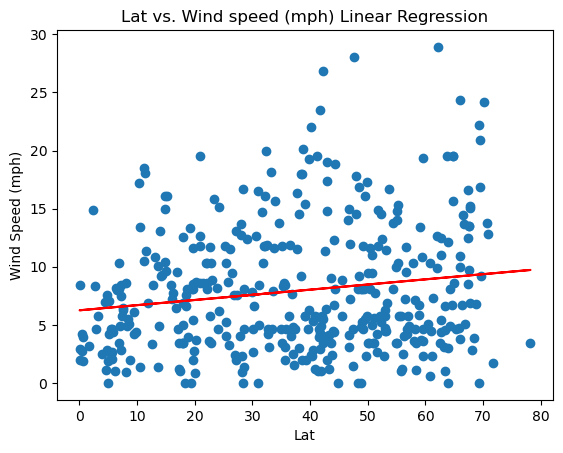

In [40]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(northern_hemi_df, 'Lat', 'Wind Speed (mph)')


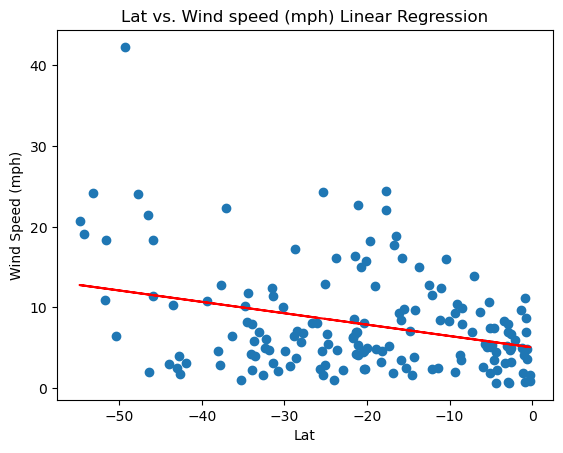

In [41]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(southern_hemi_df, 'Lat', 'Wind Speed (mph)')


**Discussion about the linear relationship:** Trend lines for both the Northern and Southern hemispheres trend upward going away from latitude 0.  